<a href="https://colab.research.google.com/github/Ryanywan/NH_Upload/blob/main/Textract_AWS_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AWS OCR (Textract) Example
## AWS Cloud 연결 Pipeline에 필요한 library를 호출합니다.

In [ ]:
import boto3

## Session을 통해 access key와 secret key를 입력하고 필요한 서비스를 호출합니다.

In [ ]:
####################### boto3를 이용하여 AWS cloud에 접속합니다. (이메일 로그인과 비슷한 방식) #######################
# aws_access_key_id : 아이디
# aws_secret_access_key: 패스워드
# region_name: 호출 지역
# client: 호출서비스

textract_client = boto3.Session(
                aws_access_key_id= #개인 필수정보 1                  
    aws_secret_access_key= #개인 필수정보 2,
    region_name='ap-northwest-2').client('textract')

### Example 1

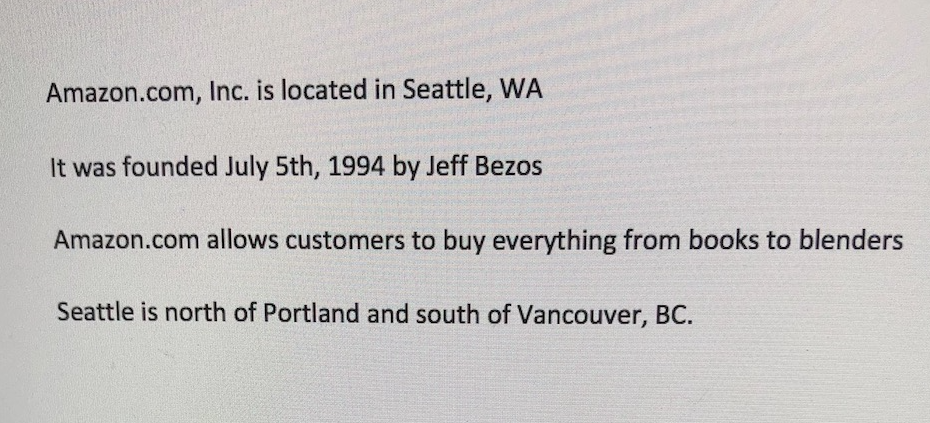

## OCR 서비스를 호출하여 지정한 파일을 읽어줍니다.

In [ ]:
# 파일지정하기
documentname = "simple-document-image.jpg"

# 문서 내용 읽기
with open(documentname, 'rb') as document:
    imageBytes = bytearray(document.read())

# AWS Textract 호출하기
response = textract_client.detect_document_text(Document={'Bytes': imageBytes})

# 인식된 text 프린트 하기
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')

Amazon.com, Inc. is located in Seattle, WA
It was founded July 5th, 1994 by Jeff Bezos
Amazon.com allows customers to buy everything from books to blenders
Seattle is north of Portland and south of Vancouver, BC.


### Example 2

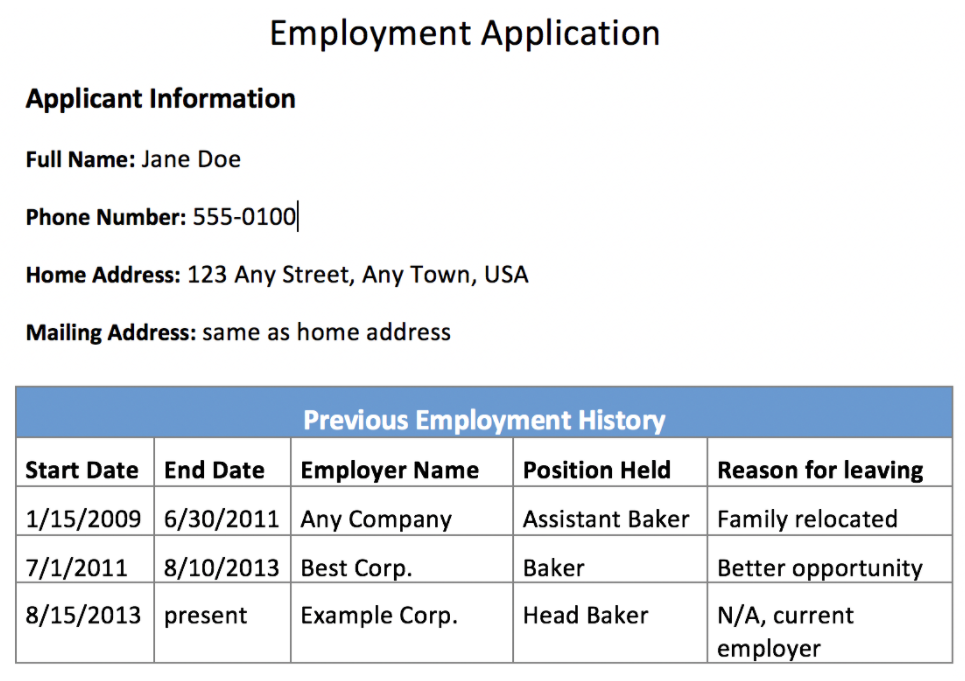

In [ ]:
# Document
documentName = 'employmentapp.png'

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

#print(response)

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')

Employment Application
Applicant Information
Full Name: Jane Doe
Phone Number: 555-0100
Home Address: 123 Any Street, Any Town, USA
Mailing Address: same as home address
Previous Employment History
Start Date
End Date
Employer Name
Position Held
Reason for leaving
1/15/2009
6/30/2011
Any Company
Assistant Baker
Family relocated
7/1/2011
8/10/2013
Best Corp.
Baker
Better opportunity
8/15/2013
present
Example Corp.
Head Baker
N/A, current
employer
